In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
#Se realiza la identificación del dataset visualizamos que tenemos 12 columnas. 
data = pd.read_csv("Titanic-Dataset.csv")
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.shape

(891, 12)

In [10]:
#Obtenemos el resumen estadístico de las variables media, desviación estándar, valor mínimo, máximo y los percentiles.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#Identificamos los valores nulos y visualizamos los resultados.
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
import matplotlib.pyplot as plt

In [20]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

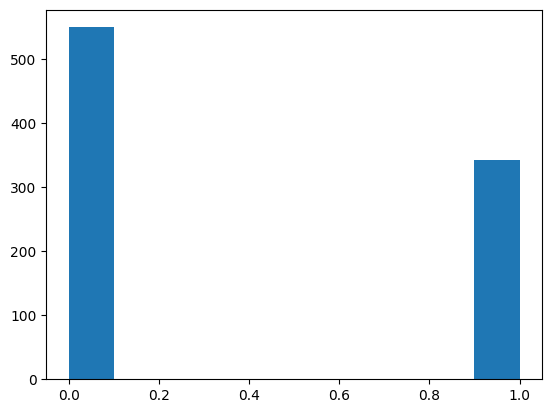

In [13]:
#Con el histograma evidenciamos la cantidad de cada Survived visualizandoque de 0.0 y 1.0 son los de mayor cantidad
plt.hist(data.Survived)

In [88]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [77]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Fare'>

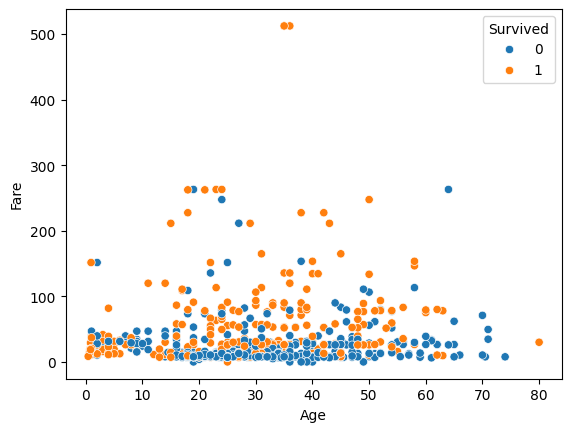

In [22]:
#En el diagrama de dispersión observamos el ancho de Age con el largo
#de Fare, el ancho se encuentra entre 0 y 80 cm y el largo entre 0 a
#500 indicando el tipo de Age. Identificando el valor 0.0 con el mayor ancho
#y 1.0 largo. 
sns.scatterplot(x = "Age", y = "Fare", hue = "Survived", data = data)

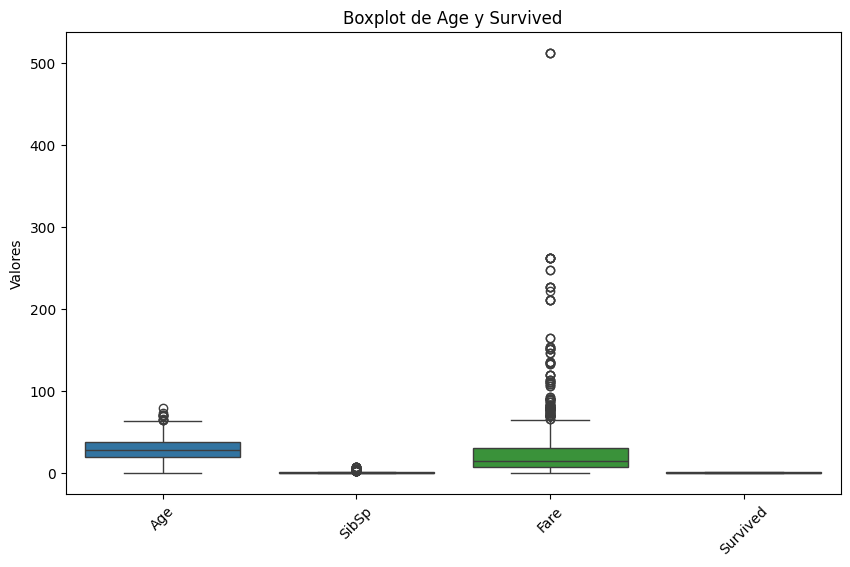

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'SibSp','Fare', 'Survived']])
plt.xticks(rotation=45)
plt.title('Boxplot de Age y Survived')
plt.ylabel('Valores')
plt.show()
#Identificación de valores atípicos evidenciando que Age, SibSp y Fare tienen valores por encima del máximo

In [25]:
#Dividimos el dataset en 2 y observamos los resultados.
predictors_col = ["Age", "SibSp", "Fare"]
target_col = ['Survived']

In [26]:
predictors = data[predictors_col]
target = data[target_col]

In [28]:
predictors

,Age,SibSp,Fare
0,22.0,1,7.2500
1,38.0,1,71.2833
2,26.0,0,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500
...,...,...,...
886,27.0,0,13.0000
887,19.0,0,30.0000
888,NaN,1,23.4500
889,26.0,0,30.0000


In [29]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [33]:
#Generamos la correlación de las variables numéricas indicando correlación directa si aumenta el largo de Fare aumenta SibSp y Age evidenciando que –0.308 de SibSp son los que menos tienen relación. Visualizando los resultados en la matriz de correlación.
corr = predictors.corr()
corr

,Age,SibSp,Fare
Age,1.000000,-0.308247,0.096067
SibSp,-0.308247,1.000000,0.159651
Fare,0.096067,0.159651,1.000000


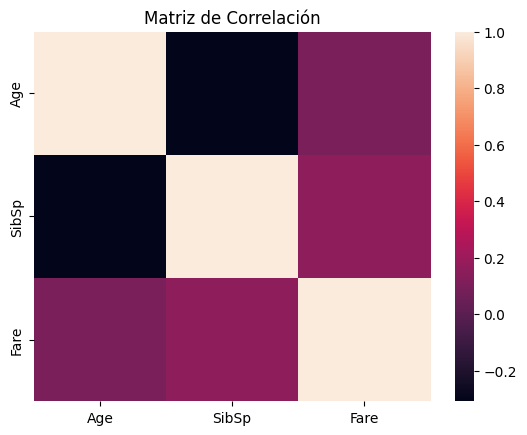

In [35]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [37]:
import pandas as pd

data = pd.read_csv('Titanic-Dataset.csv')  

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Define predictors and target
predictors_col = ["Age", "SibSp", "Fare"]
target_col = ['Survived']
predictors = data[predictors_col]
target = data[target_col]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [39]:
tree = DecisionTreeClassifier()

In [40]:
arbol = tree.fit(X_train, y_train)

[Text(0.7018100792253521, 0.98, 'x[2] <= 48.3\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.5141835387323944, 0.94, 'x[2] <= 10.481\ngini = 0.435\nsamples = 576\nvalue = [392, 184]'),
 Text(0.6079968089788732, 0.96, 'True  '),
 Text(0.3159330985915493, 0.9, 'x[0] <= 32.5\ngini = 0.343\nsamples = 264\nvalue = [206, 58]'),
 Text(0.20933098591549296, 0.86, 'x[2] <= 7.888\ngini = 0.375\nsamples = 216\nvalue = [162, 54]'),
 Text(0.09471830985915493, 0.82, 'x[2] <= 7.404\ngini = 0.436\nsamples = 115\nvalue = [78, 37]'),
 Text(0.029577464788732393, 0.78, 'x[0] <= 16.0\ngini = 0.3\nsamples = 49\nvalue = [40, 9]'),
 Text(0.011267605633802818, 0.74, 'x[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.005633802816901409, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.016901408450704224, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04788732394366197, 0.74, 'x[0] <= 19.5\ngini = 0.258\nsamples = 46\nvalue = [39, 7]'),
 Text(0.028169014084507043, 0.

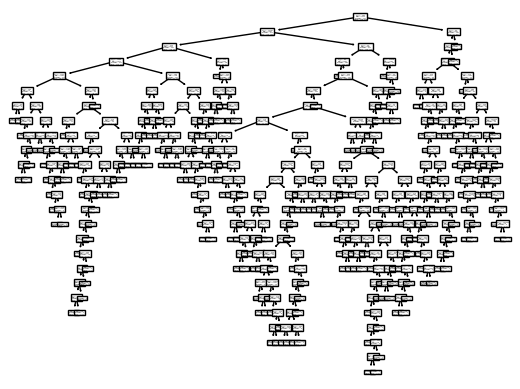

In [41]:
plot_tree(arbol) #Se dividen las predictores y target en train y test, obteniendo el árbol de decisión

In [42]:
#Iniciamos las predicciones observando los datos arrojados.
predicciones = arbol.predict(X_test)

In [43]:
predicciones

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [44]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,83,27
1,28,41


In [45]:
#Examinamos la matriz de confusión encontrando los datos acertados. 
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd

# Assuming y_test and predicciones are already defined
confusion_matrix = pd.crosstab(
    np.array([y[0] for y in y_test.values.tolist()]),
    predicciones,
    rownames=['Actual'],
    colnames=['Predicciones']
)

print(confusion_matrix)

Predicciones   0   1
Actual              
0             83  27
1             28  41


In [107]:
from sklearn.metrics import accuracy_score

In [59]:
#Se evalúa el desempeño, las predicciones realizadas obteniendo como resultado 0.6927
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6927374301675978

In [48]:
from sklearn.metrics import precision_score

In [58]:
#En la precisión obtenemos como resultado 0.6919
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6919284549090661

In [51]:
from sklearn.metrics import recall_score

In [57]:
#En la sensibilidad obtenemos como resultado 0.6927
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6927374301675978

In [54]:
from sklearn.metrics import f1_score

In [56]:
#En la media obtenemos como resultado  0.6923
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6923111981124748